# **EPIC 3 - DATA PREPARATION**

![data-preparation](../docs/images/data-preparation.png)

## Objectives

- Pre-process the data for the machine learning model.

### Acceptance Criteria
- Datasets for each breed should have similar number of images to avoid bias.
- All images should be labelled and resized to a standard size (LO 3.1).

## Tasks
- Remove any breeds with too few images if contained within the outlier_directories list.
- Resize and rename the images.

## Inputs

- The datasat folders containing the raw image datasets for each breed.

## Outputs

- An image dataset containing labelled images of a standard size and equal number of images for each breed.

---

# Set working directory

In [16]:
import os
current_dir = os.getcwd()
print("Current working directory is:", current_dir)

Current working directory is: /Users/gingermale/Documents/repos/PP5/pet-image-classifier


**If required**, run following cell to move to the parent / project root directory.

In [2]:
os.chdir(os.path.dirname(current_dir)) # Change the current working directory to the parent directory
current_dir = os.getcwd() # Get the new current working directory
print("Changing the working directory to parent folder:", current_dir)

Changing the working directory to parent folder: /Users/gingermale/Documents/repos/PP5/pet-image-classifier


Set dataset, version, input and output directories:

In [18]:
dataset = 'dataset/images'
version = 'v4'
outputs = 'outputs/' + version

if os.path.exists(outputs):
    print(f'Output directory for {version} already exists.')
else:
    os.makedirs(outputs)
    print(f'New output directory for {version} created.')

Output directory for v4 already exists.


## Remove Outliers

Firstly, review any outliers identified during the data-undersanding phase:

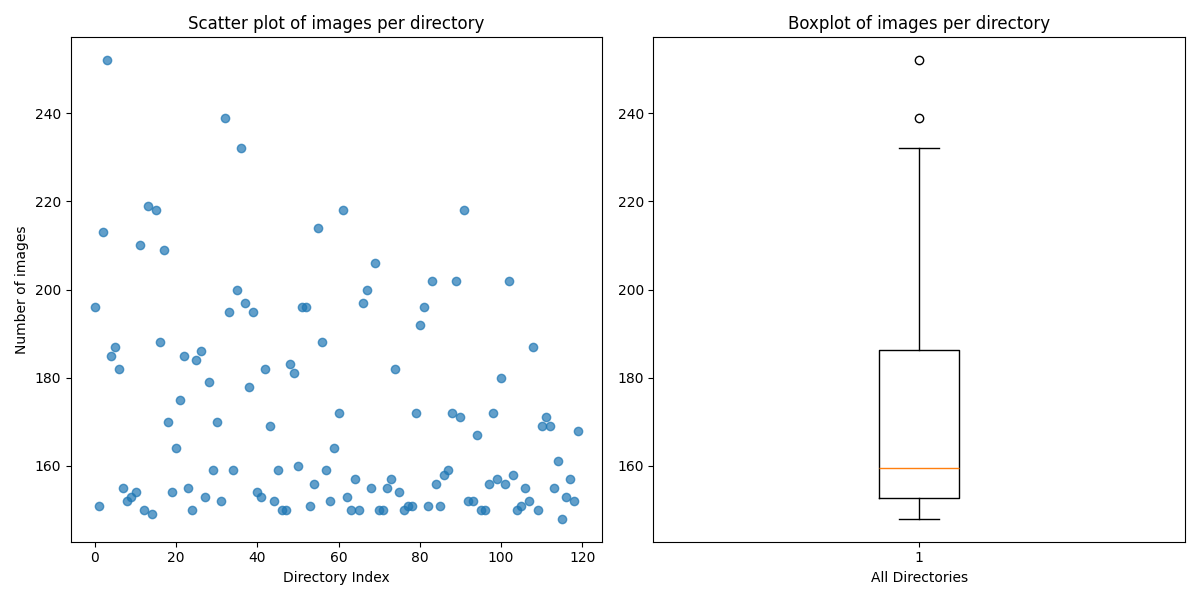

In [14]:
from IPython.display import Image
Image(filename=f'{outputs}/outlier_plot.png') 

If required, run the cell below to remove any outlier directories i.e. those with too few or too many images.

In [10]:
import shutil
import pickle

def remove_outliers(base_directory, version):
    '''Delete each directory in the provided list of directories.'''

    # Load outlier directories
    with open(f'outputs/{version}/outlier_directories.pkl', 'rb') as f:
        directories = pickle.load(f)

    # Ask for confirmation
    confirm = input(f'Are you sure you want to delete these directories? {directories} (y/n): ')
    if confirm.lower() != 'y':
        print('Operation cancelled.')
        return

    for directory in directories:
        full_path = os.path.join(base_directory, directory)
        shutil.rmtree(full_path, ignore_errors=True)

    print('Directories deleted.')

remove_outliers(dataset, version)

Operation cancelled.


# Resize images

In [13]:
import pickle
from PIL import Image, UnidentifiedImageError

def resize_images(directory, version):
    # Load image shape
    with open(f'outputs/{version}/image_shape.pkl', 'rb') as f:
        size = pickle.load(f)[:2]  # We only need the width and height

    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            if filename.endswith(('.png', '.jpg', '.jpeg', '.JPG')):
                file_path = os.path.join(dirpath, filename)
                try:
                    with Image.open(file_path) as img:
                        img = img.convert('RGB')  # Convert image to RGB mode
                        new_img = img.resize(size)
                        new_img.save(file_path)
                except UnidentifiedImageError:
                    print(f"Skipping file (not an image or corrupted): {file_path}")

resize_images(dataset, version)

# Conclusions and Next Steps

**Number of images per animal**

The datasets are now consistent in size, so any training bias has been mitigated.

**Labelling and resizing**

All images are stored within folder which identify them for training purposes. The next step, [#5](https://github.com/alanjameschapman/pet-image-classifier/issues/5) is to split the datasets into train, validate and test datasets.